<p> <font size = +2 color=blue> Distinguishing Sentiments </font> </p>

<p>A Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and presentation of findings.</p>

<p>The final output provides a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.</p>

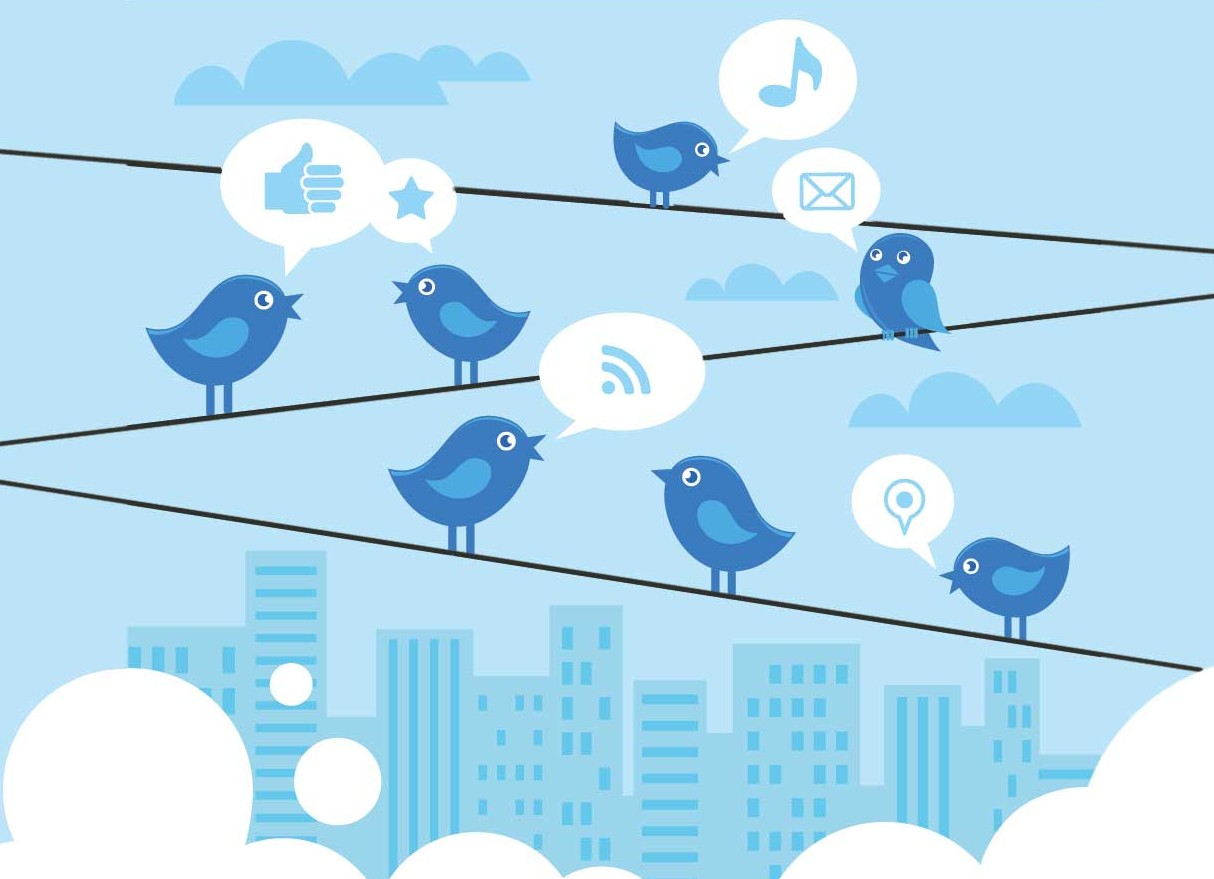

<p> <font size = +1 color=blue> Table of Contents </font> </p>

<p>The first plot:</p>
<p>A scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.</p>


<p>The second plot:</p>
<p>A bar plot visualizing the overall sentiments of the last 100 tweets from each organization</p>

In [22]:
import pandas as pd 
import tweepy
import json 
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties


In [3]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = "Ol4c9huG5geWX00yYbpnC7s8x"
consumer_secret = "AnrumSeIprEEMhnNWzfwSsdZvdtumWGhv6SCzwVvnjkGvpEosH"
access_token = "930232771292823552-J1DT1Byr4cuwJlaTtwL2BFCUdDQPFUF"
access_token_secret = "vY2vepXjJ6JsYptc9mZkBGHAuRCtCVenqDukIs2BoZYck"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_users = ["@BBC","@CNN", "@CBS", "@FoxNews", "@nytimes"]
compound_array = []
pos_array = []
neg_array = []
neu_array = []

for user in target_users:
    # Obtain tweets
    public_tweets = api.search(user, count=500, result_type="recent")
    
    # Perform sentiment analysis 
    sent_results = [analyzer.polarity_scores(tweet['text']) for tweet in public_tweets['statuses']]
    
    # Get individual sentiments
    compound = [tweet['compound'] for tweet in sent_results]
    comp_dict = {user:compound}
    compound_array.append(comp_dict)
    
    pos = [tweet['pos'] for tweet in sent_results]
    pos_dict = {user:compound}
    pos_array.append(pos_dict)
    
    neg = [tweet['neg'] for tweet in sent_results]
    neg_dict = {user:compound}
    neg_array.append(neg_dict)
    
    neu = [tweet['neu'] for tweet in sent_results]
    neu_dict = {user:compound}
    neu_array.append(neu_dict)

In [17]:
# Compound scores dataframe for each media source

df = []
for x in np.arange(0,len(compound_array)):
    compound_df = pd.DataFrame(compound_array[x])
    df.append(compound_df)

result = pd.concat(df, axis=1)
result.head()

,@BBC,@CNN,@CBS,@FoxNews,@nytimes
0,-0.2960,0.00,-0.2244,0.5423,0.0000
1,0.0000,0.00,0.7845,0.0000,-0.2500
2,-0.6722,0.00,0.0000,-0.5719,-0.4019
3,0.0000,-0.34,0.0000,-0.6908,0.0000
4,0.0000,0.75,0.0000,0.0000,-0.8074


In [13]:
# Create dataframe with average scores for every media source
df = []
positive_df = []
negative_df = []
neutral_df = []
for x in np.arange(0,len(compound_array)):
    compound_df = pd.DataFrame(compound_array[x])
    pos_df = pd.DataFrame(pos_array[x])
    neg_df = pd.DataFrame(neg_array[x])
    neu_df = pd.DataFrame(neu_array[x])
    
    df.append(compound_df)
    positive_df.append(pos_df)
    negative_df.append(neg_df)
    neutral_df.append(neu_df)
    
compound_results = pd.concat(df, axis=1)
compound_mean = pd.DataFrame(np.mean(compound_results)).reset_index()
compound_mean.columns.values[1] = 'Avg Compound Score'

pos_results = pd.concat(positive_df, axis=1)
pos_mean = pd.DataFrame(np.mean(pos_results)).reset_index()
pos_mean.columns.values[1] = 'Avg Pos Score'

neg_results = pd.concat(negative_df, axis=1)
neg_mean = pd.DataFrame(np.mean(neg_results)).reset_index()
neg_mean.columns.values[1] = 'Avg Neg Score'

neu_results = pd.concat(neutral_df, axis=1)
neu_mean = pd.DataFrame(np.mean(neu_results)).reset_index()
neu_mean.columns.values[1] = 'Avg Neu Score'

comp_pos = compound_mean.merge(pos_mean, how = 'outer', on = 'index')
neg_neu = neg_mean.merge(neu_mean, how = 'outer', on = 'index')
avg_scores = comp_pos.merge(neg_neu, how = 'outer', on = 'index')

avg_scores.columns.values[0] = "Media Source"

avg_scores

,Media Source,Avg Compound Score,Avg Pos Score,Avg Neg Score,Avg Neu Score
0,@BBC,-0.012505,-0.012505,-0.012505,-0.012505
1,@CNN,-0.082971,-0.082971,-0.082971,-0.082971
2,@CBS,0.052380,0.052380,0.052380,0.052380
3,@FoxNews,-0.105057,-0.105057,-0.105057,-0.105057
4,@nytimes,-0.145436,-0.145436,-0.145436,-0.145436


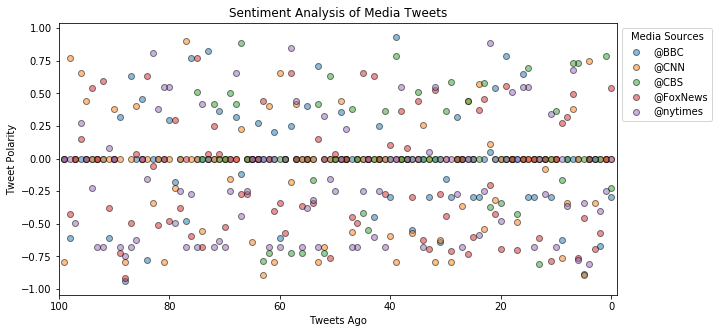

In [18]:
# Scatter showing compound score for all media sources

tweet_ago = np.arange(0,len(result))
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(len(result), -1)
[plt.scatter(tweet_ago,result[user],marker = "o",edgecolors="black",alpha='0.5') for user in result]
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1, title="Media Sources")
plt.show()

In [19]:
# Average compound score for bar graph
results_mean = np.mean(result)

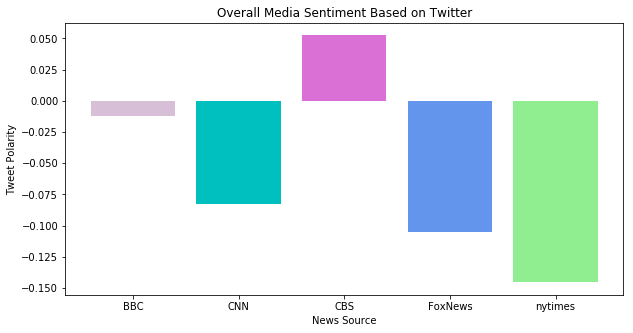

In [20]:
tweet_ago = np.arange(0,len(results_mean))
plt.figure(figsize=(10,5))
plt.title("Overall Media Sentiment Based on Twitter")
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")
labels = [user.replace("@","") for user in target_users]
plt.xticks(tweet_ago, labels)
colors = ['thistle', 'c', 'orchid', 'cornflowerblue', 'lightgreen']
plt.bar(tweet_ago,results_mean, color=colors) 
plt.show()